In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NITT datasets/OSMI 2020 Mental Health in Tech Survey Results .csv')

In [ ]:
pd.set_option('display.max_columns',None)
pd.options.display.max_rows = None

In [ ]:
data.shape

(180, 120)

In [ ]:
data.isna().sum().sum()/(131*124)

0.7099852253139621

In [ ]:
data.head(1)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [ ]:
a = data.isna().sum()
print((100*(a/len(data))))

#                                                                                                                                                                                                                                     0.000000
*Are you self-employed?*                                                                                                                                                                                                              0.000000
How many employees does your company or organization have?                                                                                                                                                                           13.888889
Is your employer primarily a tech company/organization?                                                                                                                                                                              13.888889
Is your primary role within your company rel

In [ ]:
max_na = (0.9 * len(data))
max_na

162.0

In [ ]:
data = data.loc[:,(data.isnull().sum(axis=0) <= max_na)]

In [ ]:
data.shape

(180, 81)

In [ ]:
data.columns.to_list()

['#',
 '*Are you self-employed?*',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel more comfortable talking to you

In [ ]:
data.drop(columns=['#',
                   'Do you know the options for mental health care available under your employer-provided health coverage?',
                   'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                   'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                   'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                   'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
                   'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                   'Have you ever discussed your mental health with your employer?',
                     'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.',
                     'Would you feel comfortable discussing a mental health issue with your coworkers?',
                     'Have you ever discussed your mental health with coworkers?',
                     'Describe the conversation with coworkers you had about your mental health including their reactions.',
                     "Have you ever had a coworker discuss their or another coworker's mental health with you?",
                     'Describe the conversation your coworker had with you about their mental health (please do not use names).',
                     'Overall, how much importance does your employer place on physical health?',
                     'Overall, how much importance does your employer place on mental health?',
                   'Do you know local or online resources to seek help for a mental health issue?',
                     'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
                     'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
                     'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
                     'Do you believe your productivity is ever affected by a mental health issue?',
                     '*Do you have previous employers?*',
                     'Was your employer primarily a tech company/organization?',
                     'Have your previous employers provided mental health benefits?',
                     'Were you aware of the options for mental health care provided by your previous employers?',
                     'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
                     'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
                     'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
                     'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
                     'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
                     'Did you ever discuss your mental health with your previous employer?',
                     'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.',
                     'Would you have been willing to discuss your mental health with your coworkers at previous employers?',
                     'Did you ever discuss your mental health with a previous coworker(s)?',
                     'Describe the conversation you had with your previous coworkers about your mental health including their reactions.',
                     "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
                     'Describe the conversation your coworker had with you about their mental health (please do not use names)..1',
                     'Overall, how much importance did your previous employer place on physical health?',
                     'Overall, how much importance did your previous employer place on mental health?',
                    'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
                     'Mood Disorder (Depression, Bipolar Disorder, etc).1',
                     'Anxiety Disorder (Generalized, Social, Phobia, etc).2',
                     'Mood Disorder (Depression, Bipolar Disorder, etc).2',
                     'Have you had a mental health disorder in the past?',
                   'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*',
                     'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*',
                     'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
                     'How willing would you be to share with friends and family that you have a mental illness?',
                     'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                     'Why or why not?',
                     'Would you bring up your *mental* health with a potential employer in an interview?',
                     'Why or why not?.1',
                     'Are you openly identified at work as a person with a mental health issue?',
                     'Has being identified as a person with a mental health issue affected your career?',
                     'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?',
                     'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
                     'Describe the circumstances of the badly handled or unsupportive response.',
                     'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?',
                     'Overall, how well do you think the tech industry supports employees with mental health issues?',
                     'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
                     'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.',
                     'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)',
                   'What US state or territory do you *live* in?',
                     'What is your race?',
                   'What US state or territory do you *work* in?'
], inplace=True , axis=1)

<ipython-input-13-1bdfd7d69835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['#',


In [ ]:
data.shape

(180, 16)

In [ ]:
data.columns

Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
       'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
       'Do you *currently* have a mental health disorder?',
       'Have you ever been *diagnosed* with a mental health disorder?',
       'Have you ever sought treatment for a mental health disorder from a mental health professional?',
       'Do yo

In [ ]:
data.drop(columns = 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',inplace = True, axis = 1)

<ipython-input-16-8b7667ee5e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',inplace = True, axis = 1)


In [ ]:
data.shape

(180, 15)

In [ ]:
data.columns = ['Self-employed?', 'Num. Employees', 'Tech company?',
               'Tech related role?', 'M-H benefits?','Workplace Discussion?','Medical Coverage?',
                'Current illness', 'Previously diagnosed?','Sought help?',
                'Illness history?', 'Age', 'Gender', 'Live Country',
                   'Work Country']

In [ ]:
data.isna().sum().sort_values()

Self-employed?             0
Current illness            0
Sought help?               0
Illness history?           0
Age                        0
Live Country               0
Work Country               0
Gender                     2
Num. Employees            25
Tech company?             25
Tech related role?        25
M-H benefits?             25
Workplace Discussion?     25
Previously diagnosed?    129
Medical Coverage?        155
dtype: int64

In [ ]:
data = data[data['Tech related role?'].notna()]
data.isna().sum().sort_values()

Self-employed?             0
Num. Employees             0
Tech company?              0
Tech related role?         0
M-H benefits?              0
Workplace Discussion?      0
Current illness            0
Sought help?               0
Illness history?           0
Age                        0
Live Country               0
Work Country               0
Gender                     1
Previously diagnosed?    116
Medical Coverage?        155
dtype: int64

In [ ]:
data['Tech related role?'].value_counts()

1.0    141
0.0     14
Name: Tech related role?, dtype: int64

In [ ]:
data.drop(data[data['Tech related role?'] == 0.0].index, inplace=True)

In [ ]:
data['Tech related role?'].value_counts()

1.0    141
Name: Tech related role?, dtype: int64

In [ ]:
data.drop(columns='Tech related role?',inplace=True)

In [ ]:
data['Gender'] = data['Gender'].fillna('Other')

In [ ]:
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Gender'].value_counts()

male               87
female             33
f                   9
m                   6
woman               2
other               1
female, she/her     1
mostly male         1
cisgender male      1
Name: Gender, dtype: int64

In [ ]:
data["Gender"].unique()

array(['male', 'female', 'm', 'f', 'woman', 'other', 'female, she/her',
       'mostly male', 'cisgender male'], dtype=object)

In [ ]:
Male = ['male','m','mostly male']
Female = ['female','f','woman','female, she/her']
Other = ['other','cisgender male']

In [ ]:
data['Gender'] = data['Gender'].replace(Male,'M')
data['Gender'] = data['Gender'].replace(Female,'F')
data['Gender'] = data['Gender'].replace(Other,'O')

In [ ]:
data['Gender'].value_counts()

M    94
F    45
O     2
Name: Gender, dtype: int64

In [ ]:
data['M-H benefits?'].value_counts()

Yes                               62
I don't know                      42
No                                31
Not eligible for coverage / NA     6
Name: M-H benefits?, dtype: int64

In [ ]:
data.loc[data['M-H benefits?']=='Not eligible for coverage / NA' , 'M-H benefits?'] = 'No'

In [ ]:
data['Previously diagnosed?'].value_counts()

Yes    34
No      2
Name: Previously diagnosed?, dtype: int64

In [ ]:
data['Previously diagnosed?'].fillna('Unspecified',inplace = True)

In [ ]:
a = 100 * (data.isna().sum()) / len(data)
print( 'Percentage of missing values for each column is\n')
a

Percentage of missing values for each column is



Self-employed?             0.0
Num. Employees             0.0
Tech company?              0.0
M-H benefits?              0.0
Workplace Discussion?      0.0
Medical Coverage?        100.0
Current illness            0.0
Previously diagnosed?      0.0
Sought help?               0.0
Illness history?           0.0
Age                        0.0
Gender                     0.0
Live Country               0.0
Work Country               0.0
dtype: float64

In [ ]:
data.loc[data['M-H benefits?']=='Yes', 'Medical Coverage?'] = 'Yes'

In [ ]:
data.loc[data['Live Country']=='United Kingdom', 'Medical Coverage?'] = 'Yes'

In [ ]:
US_total = data.loc[data['Live Country']=='United States of America']
print('Amount of USA residents :{}'.format(len(US_total)))

Amount of USA residents :57


In [ ]:
US_nan = data.loc[(data['Medical Coverage?'].isna()) & (data['Live Country']=='United States of America')]
print('Amount of USA residents without Medical coverage provided by their employer :{}'.format(len(US_nan)))

#Percentage of uninsured
Uninsured = round(100*((len(US_nan)) / (len(US_total))), 2)

print('This is ' + str(Uninsured) + '%')

Amount of USA residents without Medical coverage provided by their employer :17
This is 29.82%


In [ ]:
import random

In [ ]:
Nan_list = list(US_nan.index)
Random_samples = random.sample(Nan_list,4)
(Random_samples.sort())
print(Random_samples)
type(Random_samples)

[46, 68, 104, 107]


list

In [ ]:
for i in Random_samples:
  data.at[i, 'Medical Coverage?'] = 'No'

In [ ]:
data.loc[(data['Live Country']=='United States of America') & (data['Medical Coverage?'].isna()) , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()

61

In [ ]:
data['Live Country'].value_counts()

United States of America    57
India                       24
Canada                       7
Brazil                       6
Spain                        6
United Kingdom               5
Netherlands                  4
Germany                      4
Philippines                  3
Australia                    3
France                       2
Sweden                       2
South Africa                 2
Indonesia                    2
Poland                       2
Sri Lanka                    2
Portugal                     1
Chile                        1
Taiwan                       1
Mongolia                     1
Serbia                       1
Egypt                        1
Ukraine                      1
Turkey                       1
Bangladesh                   1
Ireland                      1
Name: Live Country, dtype: int64

In [ ]:
data.loc[(data['Live Country']=='Germany') | (data['Live Country']=='France') | (data['Live Country']=='Canada') |
         (data['Live Country']=='Spain') | (data['Live Country']=='Netherlands')
         , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()

44

In [ ]:
data['Self-employed?'] = data['Self-employed?'].replace({1 : 'Yes' , 0 : 'No'})


In [ ]:
data['Tech company?'] = data['Tech company?'].replace({1.0 : 'Yes' , 0.0 : 'No'})

In [ ]:
data['Sought help?'] = data['Sought help?'].replace({1 : 'Yes' , 0 : 'No'})


In [ ]:
data['Age'].describe()


count    141.000000
mean      34.567376
std        9.098120
min       20.000000
25%       28.000000
50%       32.000000
75%       40.000000
max       62.000000
Name: Age, dtype: float64

In [ ]:
age_min = data['Age'].min()
age_max = data['Age'].max()

bins = np.linspace(age_min, age_max, 10)
labels = ['G1','G2','G3','G4','G5','G6','G7','G8','G9']
bins

array([20.        , 24.66666667, 29.33333333, 34.        , 38.66666667,
       43.33333333, 48.        , 52.66666667, 57.33333333, 62.        ])

In [ ]:
data['Age'] = pd.cut(x=data['Age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
column_names = list(data.columns)

In [ ]:
for col in column_names:
    data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 25 to 179
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Self-employed?         141 non-null    category
 1   Num. Employees         141 non-null    category
 2   Tech company?          141 non-null    category
 3   M-H benefits?          141 non-null    category
 4   Workplace Discussion?  141 non-null    category
 5   Medical Coverage?      97 non-null     category
 6   Current illness        141 non-null    category
 7   Previously diagnosed?  141 non-null    category
 8   Sought help?           141 non-null    category
 9   Illness history?       141 non-null    category
 10  Age                    141 non-null    category
 11  Gender                 141 non-null    category
 12  Live Country           141 non-null    category
 13  Work Country           141 non-null    category
dtypes: category(14)
memory usage: 11.0 KB


In [ ]:
data.nunique()


Self-employed?            1
Num. Employees            6
Tech company?             2
M-H benefits?             3
Workplace Discussion?     3
Medical Coverage?         2
Current illness           4
Previously diagnosed?     3
Sought help?              2
Illness history?          3
Age                       9
Gender                    3
Live Country             26
Work Country             25
dtype: int64

In [ ]:
data['Self-employed?'].unique()

['No']
Categories (1, object): ['No']

In [ ]:
data.drop(columns='Self-employed?', inplace=True)

<Axes: title={'center': 'Distribution of different age groups'}, xlabel='Age groups', ylabel='Number of individuals'>

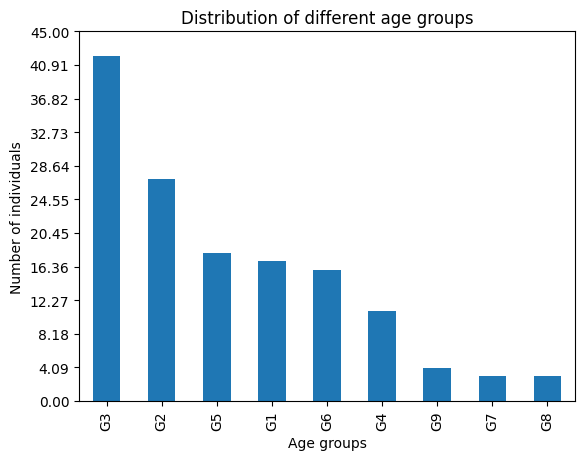

In [ ]:
data['Age'].value_counts().plot(kind='bar',xlabel='Age groups',ylabel='Number of individuals',
                                title='Distribution of different age groups', yticks=np.linspace(0,45,12))

In [ ]:
data2 = pd.get_dummies(data, drop_first=True)

In [ ]:
print(data2.shape)
data2.columns

(141, 78)


Index(['Num. Employees_100-500', 'Num. Employees_26-100',
       'Num. Employees_500-1000', 'Num. Employees_6-25',
       'Num. Employees_More than 1000', 'Tech company?_Yes',
       'M-H benefits?_No', 'M-H benefits?_Yes', 'Workplace Discussion?_No',
       'Workplace Discussion?_Yes', 'Medical Coverage?_Yes',
       'Current illness_No', 'Current illness_Possibly', 'Current illness_Yes',
       'Previously diagnosed?_Unspecified', 'Previously diagnosed?_Yes',
       'Sought help?_Yes', 'Illness history?_No', 'Illness history?_Yes',
       'Age_G2', 'Age_G3', 'Age_G4', 'Age_G5', 'Age_G6', 'Age_G7', 'Age_G8',
       'Age_G9', 'Gender_M', 'Gender_O', 'Live Country_Bangladesh',
       'Live Country_Brazil', 'Live Country_Canada', 'Live Country_Chile',
       'Live Country_Egypt', 'Live Country_France', 'Live Country_Germany',
       'Live Country_India', 'Live Country_Indonesia', 'Live Country_Ireland',
       'Live Country_Mongolia', 'Live Country_Netherlands',
       'Live Country_Phil

In [ ]:
X = data2.drop('Current illness_Yes', axis=1)
y = data2['Current illness_Yes']

In [ ]:
#Categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Num. Employees_100-500: 3.315306
 Num. Employees_26-100: 0.550095
 Num. Employees_500-1000: 0.006140
 Num. Employees_6-25: 1.100952
 Num. Employees_More than 1000: 3.520147
 Tech company?_Yes: 0.013120
 M-H benefits?_No: 0.297555
 M-H benefits?_Yes: 3.229647
 Workplace Discussion?_No: 0.199310
 Workplace Discussion?_Yes: 1.187659
 Medical Coverage?_Yes: 3.854173
 Current illness_No: 16.114286
 Current illness_Possibly: 13.371429
 Previously diagnosed?_Unspecified: 36.000000
 Previously diagnosed?_Yes: 99.166667
 Sought help?_Yes: 23.886054
 Illness history?_No: 10.590612
 Illness history?_Yes: 13.854762
 Age_G2: 4.664903
 Age_G3: 0.204082
 Age_G4: 0.017532
 Age_G5: 3.386243
 Age_G6: 1.205357
 Age_G7: 1.028571
 Age_G8: 0.096032
 Age_G9: 0.000595
 Gender_M: 0.055952
 Gender_O: 0.629762
 Live Country_Bangladesh: 0.342857
 Live Country_Brazil: 2.057143
 Live Country_Canada: 0.465646
 Live Country_Chile: 2.916667
 Live Country_Egypt: 0.342857
 Live Country_France: 0.629762
 Live Country_Ge

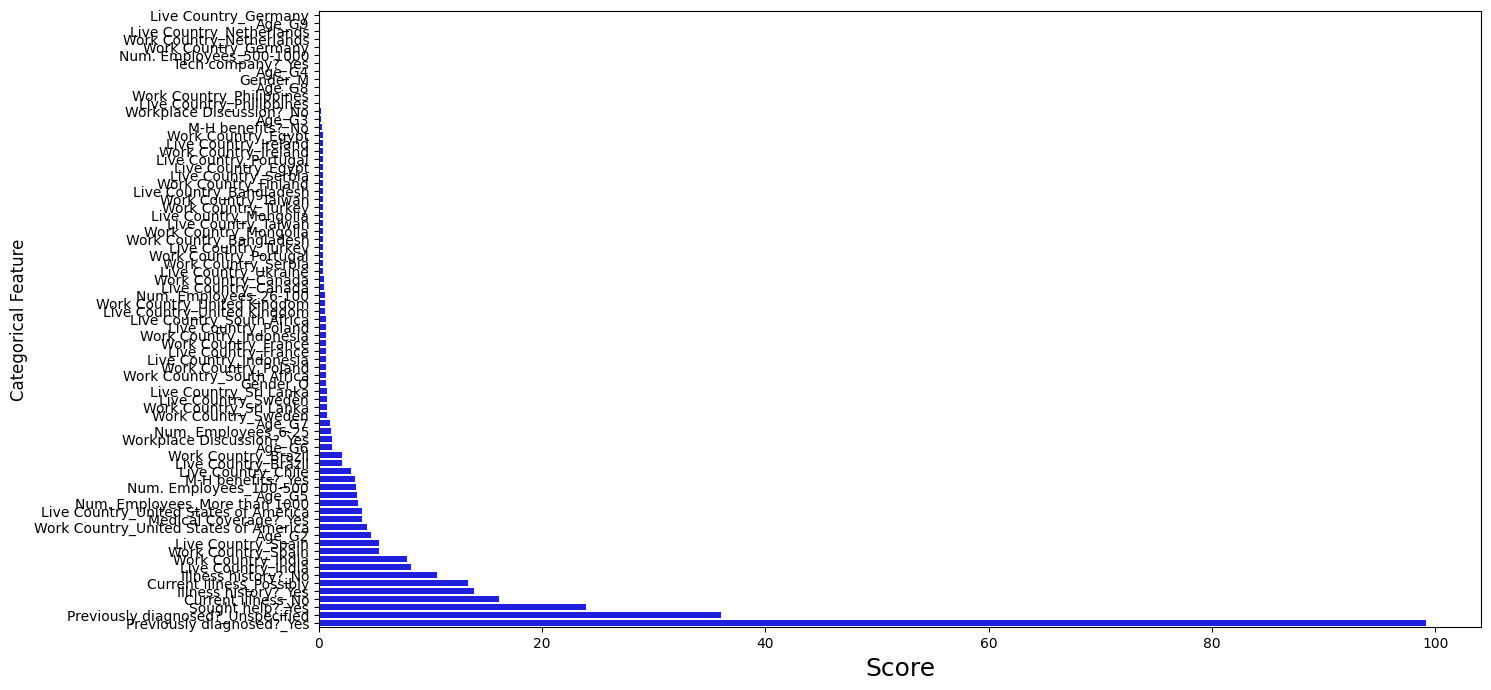

In [ ]:
datset = pd.DataFrame()
datset['feature'] = X.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)

#Create barplot
plt.figure(figsize=(15,8))
sns.barplot(x=datset['scores'], y=datset['feature'], color='blue')
#Set style attributes
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
X1 = data.drop('Current illness', axis=1)
y1 = data['Current illness']

In [ ]:
oe = OrdinalEncoder()
oe.fit(X1)
X_enc = oe.transform(X1)

#Prepare target variable
#Label encoder is used to encode the output, or target variable,
#  in this case if the entry individual has a current mental illness or not
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

In [ ]:
print(X_enc.shape)
X_enc

(141, 12)


array([[ 5.,  0.,  2., ...,  1., 25., 24.],
       [ 3.,  1.,  1., ...,  1.,  8.,  8.],
       [ 4.,  1.,  0., ...,  1., 25., 24.],
       ...,
       [ 1.,  1.,  0., ...,  1., 25., 24.],
       [ 3.,  0.,  2., ...,  1.,  3.,  3.],
       [ 3.,  1.,  1., ...,  1., 12., 12.]])

In [ ]:
print(y_enc.shape)
y_enc

(141,)


array([2, 0, 2, 3, 2, 3, 3, 1, 0, 2, 1, 2, 1, 3, 3, 1, 2, 1, 1, 2, 1, 3,
       0, 3, 2, 1, 3, 0, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 3, 0, 2, 2, 2, 1,
       3, 0, 1, 3, 1, 1, 3, 2, 1, 1, 3, 2, 2, 1, 2, 2, 2, 3, 1, 1, 0, 2,
       2, 1, 1, 3, 1, 0, 0, 1, 3, 0, 0, 1, 1, 3, 1, 3, 0, 1, 1, 2, 1, 2,
       2, 0, 0, 3, 2, 3, 1, 2, 0, 3, 1, 3, 1, 1, 2, 2, 2, 1, 2, 2, 3, 3,
       3, 1, 1, 1, 2, 1, 3, 3, 2, 2, 1, 1, 2, 3, 1, 1, 0, 1, 3, 1, 3, 1,
       0, 2, 3, 1, 1, 2, 3, 2, 1])

In [ ]:
np.any(np.isnan(X_enc))

True

In [ ]:
X_enc[np.isnan(X_enc)] = 0

In [ ]:
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)

#Print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Num. Employees: 7.334322
 Tech company?: 0.293371
 M-H benefits?: 8.167693
 Workplace Discussion?: 1.859371
 Medical Coverage?: 6.406716
 Previously diagnosed?: 17.263969
 Sought help?: 29.526878
 Illness history?: 5.374665
 Age: 5.893509
 Gender: 0.280581
 Live Country: 115.788233
 Work Country: 115.666600


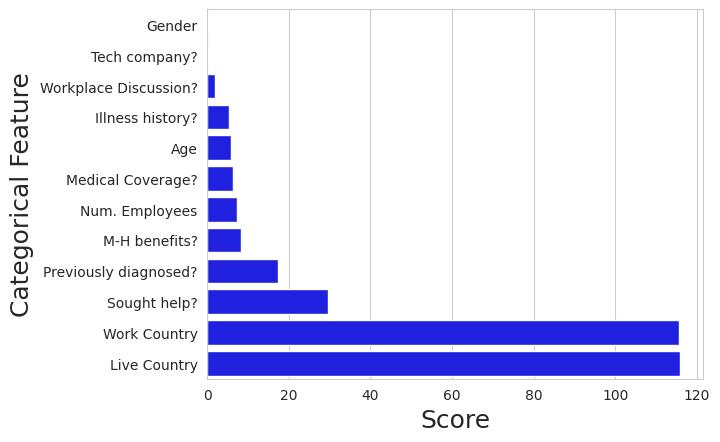

In [ ]:
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)

#Create barplot
sns.barplot(x=datset1['scores'], y=datset1['feature'], color='blue')
#Set style
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
data

,Num. Employees,Tech company?,M-H benefits?,Workplace Discussion?,Medical Coverage?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Age,Gender,Live Country,Work Country
25,More than 1000,No,Yes,Yes,Yes,Possibly,Unspecified,No,Yes,G2,M,United States of America,United States of America
26,500-1000,Yes,No,I don't know,NaN,Don't Know,Unspecified,No,No,G3,M,India,India
27,6-25,Yes,I don't know,No,Yes,Possibly,Unspecified,No,I don't know,G3,M,United States of America,United States of America
28,26-100,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,Yes,G6,F,United States of America,United States of America
29,500-1000,Yes,No,No,NaN,Possibly,Unspecified,Yes,No,G3,M,India,India
30,More than 1000,Yes,Yes,Yes,Yes,Yes,Yes,Yes,I don't know,G4,M,Philippines,Philippines
31,More than 1000,No,I don't know,No,Yes,Yes,Yes,No,No,G6,M,United States of America,United States of America
32,More than 1000,Yes,Yes,Yes,Yes,No,Unspecified,No,No,G2,F,India,India
33,26-100,Yes,I don't know,I don't know,NaN,Don't Know,Unspecified,No,I don't know,G1,M,Sri Lanka,Sri Lanka
34,More than 1000,Yes,I don't know,No,Yes,Possibly,Unspecified,No,No,G3,F,United States of America,United States of America


In [ ]:
data.drop(columns=['Workplace Discussion?','Tech company?'],
          inplace=True)

In [ ]:
data.to_csv('Data_2020.csv')

In [ ]:
df = pd.read_csv('/content/Data_2020.csv')

In [ ]:
df

,Unnamed: 0,Num. Employees,M-H benefits?,Medical Coverage?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Age,Gender,Live Country,Work Country
0,25,More than 1000,Yes,Yes,Possibly,Unspecified,No,Yes,G2,M,United States of America,United States of America
1,26,500-1000,No,NaN,Don't Know,Unspecified,No,No,G3,M,India,India
2,27,6-25,I don't know,Yes,Possibly,Unspecified,No,I don't know,G3,M,United States of America,United States of America
3,28,26-100,Yes,Yes,Yes,Yes,Yes,Yes,G6,F,United States of America,United States of America
4,29,500-1000,No,NaN,Possibly,Unspecified,Yes,No,G3,M,India,India
5,30,More than 1000,Yes,Yes,Yes,Yes,Yes,I don't know,G4,M,Philippines,Philippines
6,31,More than 1000,I don't know,Yes,Yes,Yes,No,No,G6,M,United States of America,United States of America
7,32,More than 1000,Yes,Yes,No,Unspecified,No,No,G2,F,India,India
8,33,26-100,I don't know,NaN,Don't Know,Unspecified,No,I don't know,G1,M,Sri Lanka,Sri Lanka
9,34,More than 1000,I don't know,Yes,Possibly,Unspecified,No,No,G3,F,United States of America,United States of America


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df.to_csv('Data_2020.csv')